In [13]:
from keras.layers import Dense,Dropout,Input,MaxPooling2D,ZeroPadding2D,Conv2D,Flatten
from keras.models import Sequential
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam,SGD
from keras.preprocessing.image import img_to_array,load_img,ImageDataGenerator
from keras.utils import to_categorical

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_colwidth=150

In [14]:
df = pd.read_csv('./dog_data/labels.csv')
train = "./dog_data/train/"
test="./dog_data/test/"

In [15]:
df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [9]:
#Number of different breed type
df.breed.value_counts()

breed
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: count, Length: 120, dtype: int64

In [16]:
#Top 20 breed
top_20=list(df.breed.value_counts()[0:20].index)
top_20

['scottish_deerhound',
 'maltese_dog',
 'afghan_hound',
 'entlebucher',
 'bernese_mountain_dog',
 'shih-tzu',
 'great_pyrenees',
 'pomeranian',
 'basenji',
 'samoyed',
 'airedale',
 'tibetan_terrier',
 'leonberg',
 'cairn',
 'beagle',
 'japanese_spaniel',
 'australian_terrier',
 'blenheim_spaniel',
 'miniature_pinscher',
 'irish_wolfhound']

In [17]:
df2=df[df.breed.isin(top_20)]
df2.shape

(2184, 2)

<Axes: xlabel='breed'>

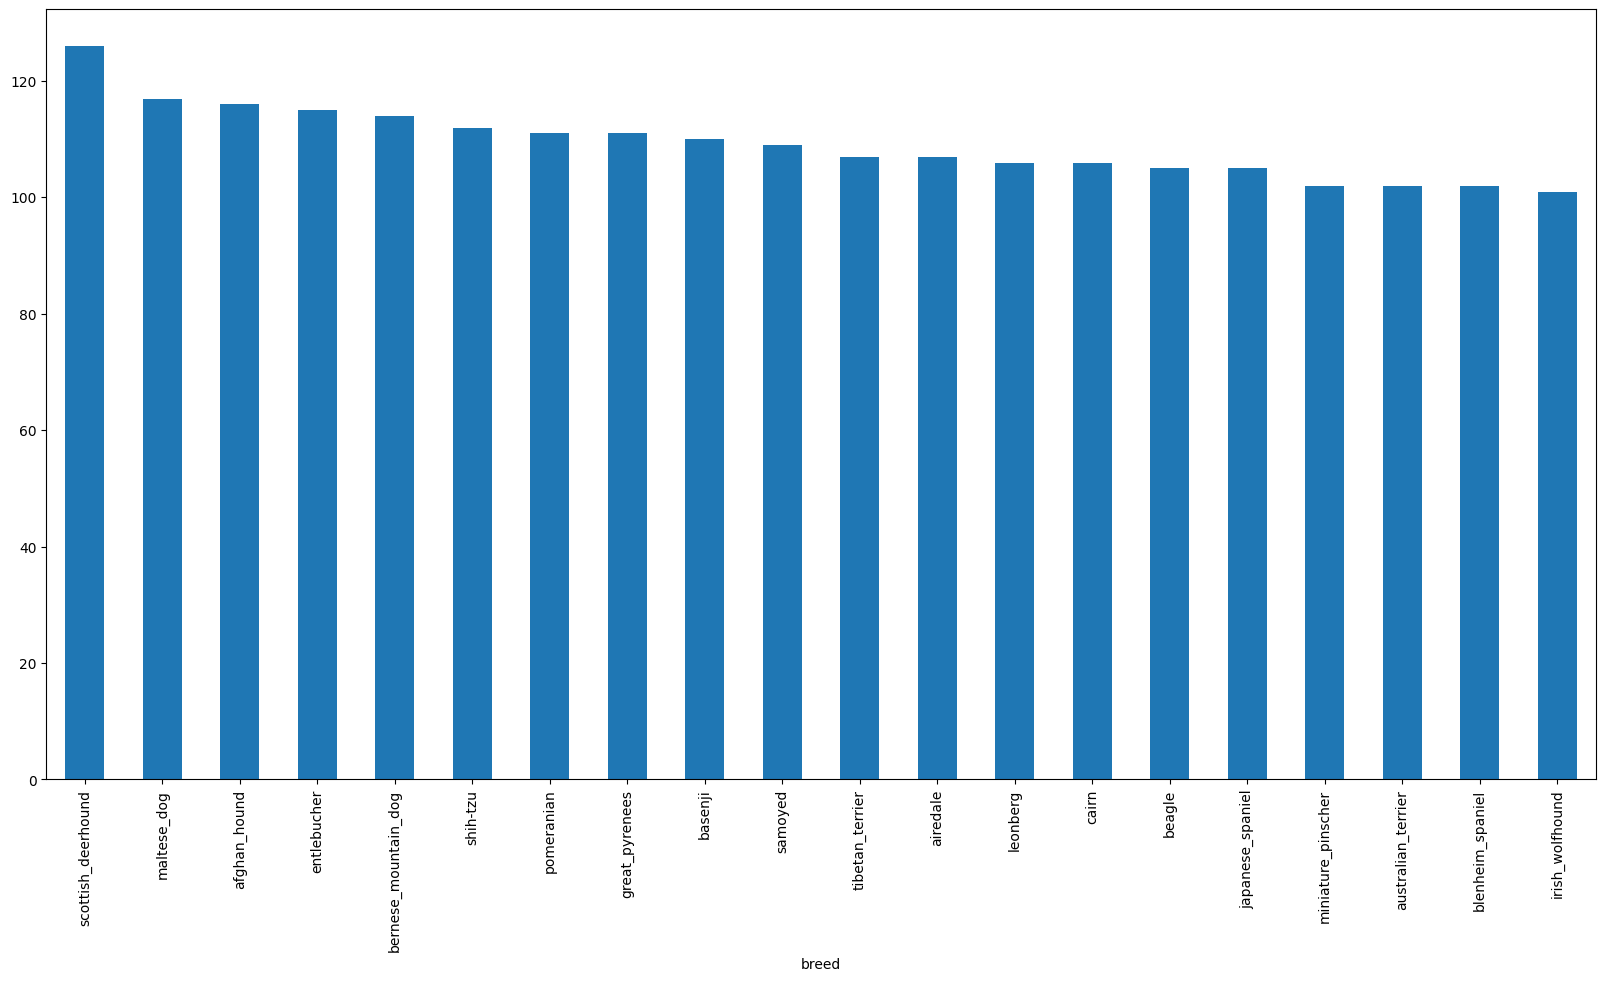

In [19]:
df2["breed"].value_counts().plot.bar(figsize=(20, 10))

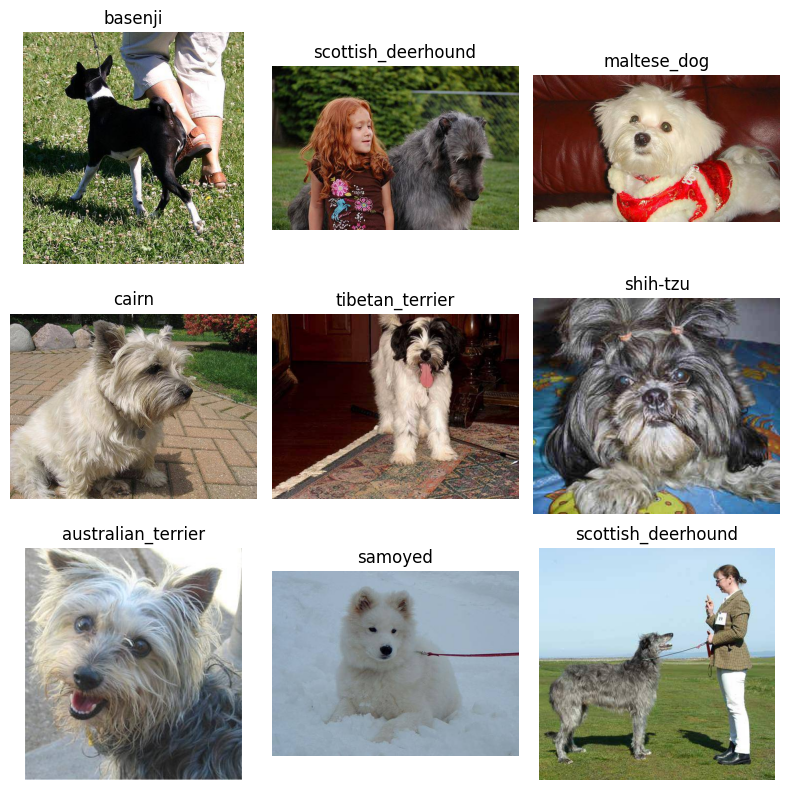

In [20]:
nrow=3
ncol=3
fig,ax=plt.subplots(nrow,ncol,figsize=(8,8))
for i,(img_id,breed) in enumerate(df2[["id","breed"]].values[: nrow*ncol]):
    image_path=os.path.join(train,img_id+".jpg")
    image=cv2.imread(image_path)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    row=i//ncol
    col=i%ncol
    ax[row,col].imshow(image)
    ax[row,col].set_title(breed)
    ax[row,col].axis("off")
    
plt.tight_layout()
plt.show()

In [25]:
import numpy as np
labels = df2["breed"].to_numpy()
#labels = np.array(labels) does same thing as above
labels

array(['basenji', 'scottish_deerhound', 'maltese_dog', ..., 'samoyed',
       'airedale', 'miniature_pinscher'], dtype=object)

In [1]:
from sklearn.preprocessing import LabelEncoder
num_breed = 120
image_size = 200
batch_size = 32
encoder = LabelEncoder()

In [27]:
breed=list(df2["breed"].value_counts().keys())
new=sorted(breed,reverse=True)[: num_breed]
df2=df2.query("breed in @new")
df2

,id,breed
8,003df8b8a8b05244b1d920bb6cf451f9,basenji
9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound
12,00693b8bc2470375cc744a6391d397ec,maltese_dog
29,00bee065dcec471f26394855c5c2f3de,cairn
48,013f8fdf6d638c7bb042f5f17e8a9fdc,tibetan_terrier
...,...,...
10212,ffc532991d3cd7880d27a449ed1c4770,tibetan_terrier
10215,ffcde16e7da0872c357fbc7e2168c05f,airedale
10216,ffcffab7e4beef9a9b8076ef2ca51909,samoyed
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale


In [28]:
df2['image_file'] = df2['id'].apply(lambda x: x + ".jpg")
df2.head()

,id,breed,image_file
8,003df8b8a8b05244b1d920bb6cf451f9,basenji,003df8b8a8b05244b1d920bb6cf451f9.jpg
9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound,0042188c895a2f14ef64a918ed9c7b64.jpg
12,00693b8bc2470375cc744a6391d397ec,maltese_dog,00693b8bc2470375cc744a6391d397ec.jpg
29,00bee065dcec471f26394855c5c2f3de,cairn,00bee065dcec471f26394855c5c2f3de.jpg
48,013f8fdf6d638c7bb042f5f17e8a9fdc,tibetan_terrier,013f8fdf6d638c7bb042f5f17e8a9fdc.jpg


In [30]:
import numpy as np
from tensorflow.keras.applications.mobilenet import preprocess_input

In [40]:
train_data=np.zeros((len(df2),image_size,image_size,3),dtype="float32")
for i,img_id in enumerate(df2["image_file"]):
    img=cv2.resize(cv2.imread(train+img_id,cv2.IMREAD_COLOR),((image_size,image_size)))
    img_array=preprocess_input(np.expand_dims(np.array(img[...,: : -1].astype(np.float32)).copy(),axis=0))
    train_data[i]=img_array

In [41]:
train_data[i]

array([[[ 0.32549024,  0.28627455,  0.28627455],
        [ 0.3176471 ,  0.27058828,  0.27058828],
        [ 0.3411765 ,  0.2941177 ,  0.2941177 ],
        ...,
        [-0.01960784, -0.02745098, -0.06666666],
        [ 0.05882359,  0.02745104, -0.00392157],
        [ 0.03529418, -0.00392157, -0.03529412]],

       [[ 0.33333337,  0.28627455,  0.28627455],
        [ 0.3411765 ,  0.30196083,  0.30196083],
        [ 0.3803922 ,  0.33333337,  0.33333337],
        ...,
        [-0.08235294, -0.09019607, -0.12156862],
        [-0.03529412, -0.06666666, -0.10588235],
        [-0.01176471, -0.05098039, -0.08235294]],

       [[ 0.32549024,  0.27843142,  0.27843142],
        [ 0.35686278,  0.30980396,  0.30980396],
        [ 0.38823533,  0.33333337,  0.33333337],
        ...,
        [-0.12156862, -0.12941176, -0.1607843 ],
        [-0.0745098 , -0.10588235, -0.12941176],
        [-0.02745098, -0.06666666, -0.09019607]],

       ...,

       [[ 0.3411765 , -0.04313725, -0.31764704],
        [ 0

In [42]:
lab = df2["breed"].unique().tolist()
print(lab)

['basenji', 'scottish_deerhound', 'maltese_dog', 'cairn', 'tibetan_terrier', 'shih-tzu', 'australian_terrier', 'samoyed', 'entlebucher', 'airedale', 'leonberg', 'bernese_mountain_dog', 'afghan_hound', 'miniature_pinscher', 'irish_wolfhound', 'great_pyrenees', 'beagle', 'japanese_spaniel', 'pomeranian', 'blenheim_spaniel']


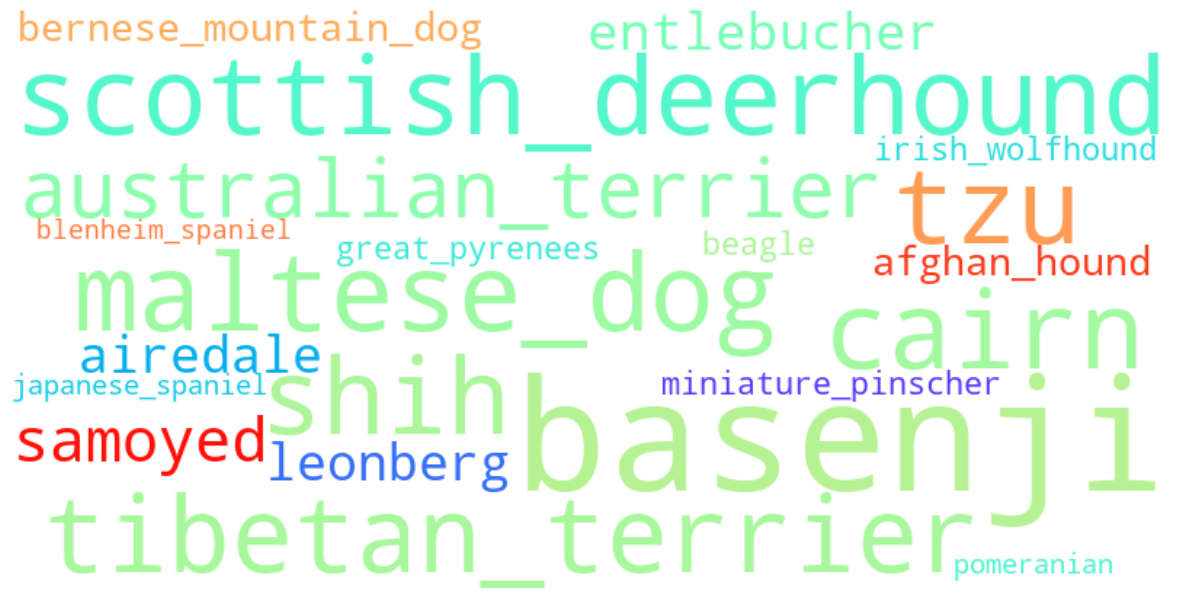

In [43]:
from wordcloud import WordCloud
text = ' '.join(lab)
wordcloud = WordCloud(width=800, height=400, background_color='white',colormap="rainbow").generate(text)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [44]:
label_data = encoder.fit_transform(df2["breed"].values)
from sklearn.model_selection import train_test_split

In [45]:
x_train, x_test, y_train, y_test = train_test_split(train_data,label_data,test_size=0.2,random_state=42)

In [46]:
print("************************************************************")
print("Train Data Shape :",x_train.shape)
print("************************************************************")
print("Test Data Shape :",x_test.shape)
print("************************************************************")
print("Train Label Data Shape :",y_train.shape)
print("************************************************************")
print("Test Label Data Shape :",y_test.shape)
print("************************************************************")

************************************************************
Train Data Shape : (1747, 200, 200, 3)
************************************************************
Test Data Shape : (437, 200, 200, 3)
************************************************************
Train Label Data Shape : (1747,)
************************************************************
Test Label Data Shape : (437,)
************************************************************


In [47]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rotation_range=45,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.25,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow(x_train, 
                                     y_train, 
                                     batch_size=batch_size)

test_datagen = ImageDataGenerator()
 
test_generator = test_datagen.flow(x_test, 
                                   y_test, 
                                   batch_size=batch_size)

In [48]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model
import tensorflow as tf


resnet = ResNet50V2(input_shape = [image_size,image_size,3], weights='imagenet', include_top=False)
for layer in resnet.layers:
    layer.trainable = False
x = resnet.output
x = BatchNormalization()(x)
x = GlobalAveragePooling2D()(x)
# x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
# x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)
prediction = Dense(num_breed, activation='softmax')(x)
model = Model(inputs=resnet.input, outputs=prediction)

learning_rate = 1e-3
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=["accuracy"])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 200, 200, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 206, 206, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 100, 100, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 102, 102, 64)         0         ['conv1_conv[0][0]']          
                                                                                              

In [49]:
history = model.fit(train_generator,steps_per_epoch= x_train.shape[0] // batch_size,epochs=15,
                 validation_data= test_generator,
                 validation_steps= x_test.shape[0] // batch_size)

Epoch 1/15
54/54 [==============================] - 83s 1s/step - loss: 1.5275 - accuracy: 0.5961 - val_loss: 0.5295 - val_accuracy: 0.8269
Epoch 2/15
54/54 [==============================] - 74s 1s/step - loss: 0.6258 - accuracy: 0.8047 - val_loss: 0.5222 - val_accuracy: 0.8510
Epoch 3/15
54/54 [==============================] - 70s 1s/step - loss: 0.5212 - accuracy: 0.8280 - val_loss: 0.4736 - val_accuracy: 0.8486
Epoch 4/15
54/54 [==============================] - 80s 1s/step - loss: 0.4583 - accuracy: 0.8513 - val_loss: 0.5804 - val_accuracy: 0.8245
Epoch 5/15
54/54 [==============================] - 89s 2s/step - loss: 0.4499 - accuracy: 0.8571 - val_loss: 0.4787 - val_accuracy: 0.8702
Epoch 6/15
54/54 [==============================] - 80s 1s/step - loss: 0.3838 - accuracy: 0.8688 - val_loss: 0.5436 - val_accuracy: 0.8510
Epoch 7/15
54/54 [==============================] - 77s 1s/step - loss: 0.4227 - accuracy: 0.8653 - val_loss: 0.5469 - val_accuracy: 0.8462
Epoch 8/15
54/54 [==

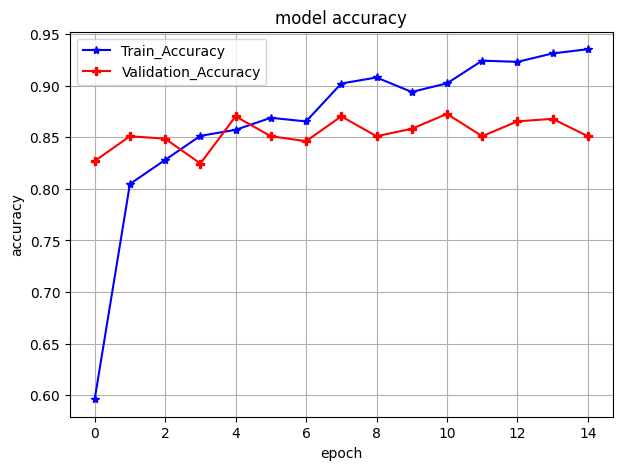

In [50]:
plt.figure(figsize=(7,5))
plt.plot(history.history['accuracy'],label="Train_Accuracy",color="blue",marker="*")
plt.plot(history.history['val_accuracy'],label="Validation_Accuracy",color="red",marker="P")
plt.grid(True)
plt.legend()
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

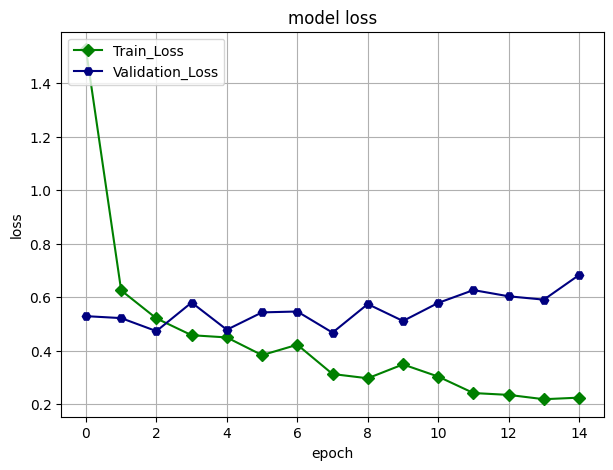

In [51]:
plt.figure(figsize=(7,5))
plt.plot(history.history['loss'],color="green",marker="D")
plt.plot(history.history['val_loss'],color="navy",marker="H")
plt.grid(True)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train_Loss', 'Validation_Loss'], loc='upper left')
plt.show()

14/14 [==============================] - 15s 1s/step


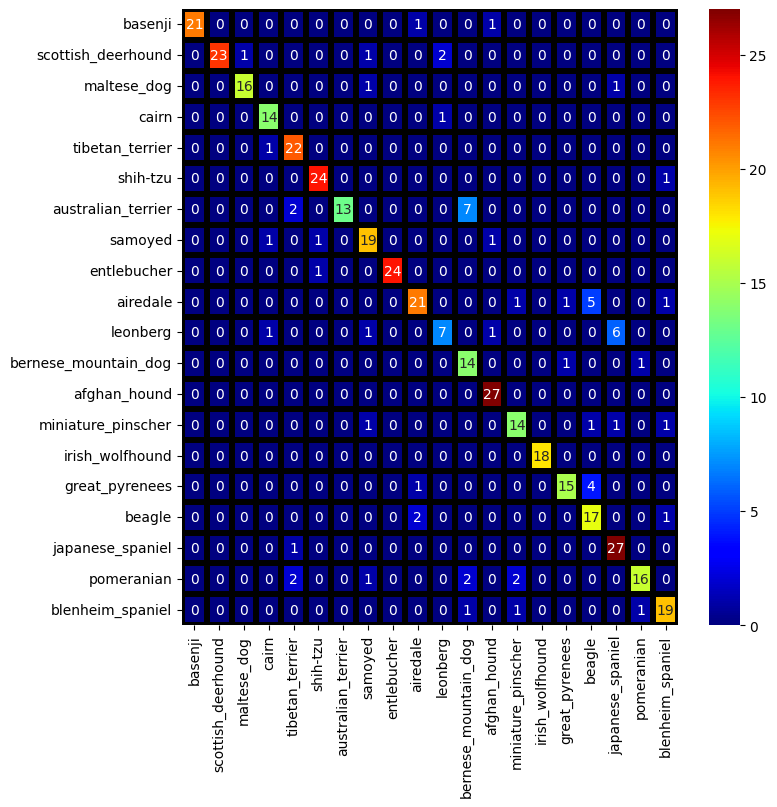

In [56]:
pre=model.predict(x_test)
predict=np.argmax(pre,axis=1)

from sklearn.metrics import confusion_matrix, classification_report
plt.figure(figsize=(8,8))
cf=confusion_matrix(y_test,predict)
sns.heatmap(cf,annot=True,fmt="d",cmap="jet",lw=4,linecolor="black",xticklabels=lab,yticklabels=lab)
plt.show()

In [53]:
print(classification_report(y_test,predict,target_names=lab))

                      precision    recall  f1-score   support

             basenji       1.00      0.91      0.95        23
  scottish_deerhound       1.00      0.85      0.92        27
         maltese_dog       0.94      0.89      0.91        18
               cairn       0.82      0.93      0.87        15
     tibetan_terrier       0.81      0.96      0.88        23
            shih-tzu       0.92      0.96      0.94        25
  australian_terrier       1.00      0.59      0.74        22
             samoyed       0.79      0.86      0.83        22
         entlebucher       1.00      0.96      0.98        25
            airedale       0.84      0.72      0.78        29
            leonberg       0.70      0.44      0.54        16
bernese_mountain_dog       0.58      0.88      0.70        16
        afghan_hound       0.90      1.00      0.95        27
  miniature_pinscher       0.78      0.78      0.78        18
     irish_wolfhound       1.00      1.00      1.00        18
      g

ValueError: Found input variables with inconsistent numbers of samples: [8740, 52440]

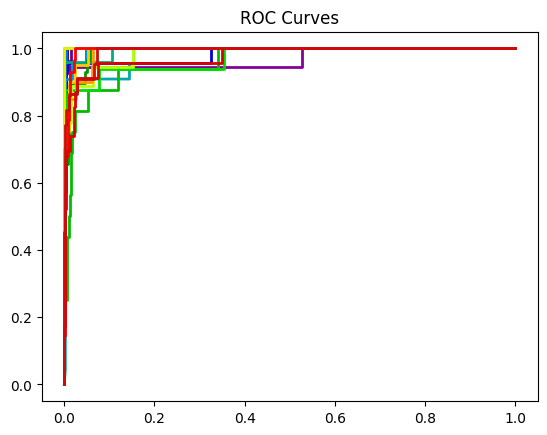

In [57]:
# pred=model.predict(x_test)
# plt.figure(figsize=(30,20))
import scikitplot as skplt

skplt.metrics.plot_roc(y_test, pre)
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [8740, 52440]

<Figure size 2000x1500 with 0 Axes>

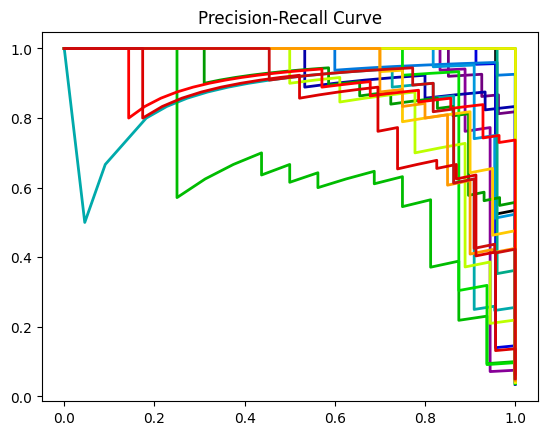

In [58]:
plt.figure(figsize=(20,15))
skplt.metrics.plot_precision_recall(y_test, pre)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

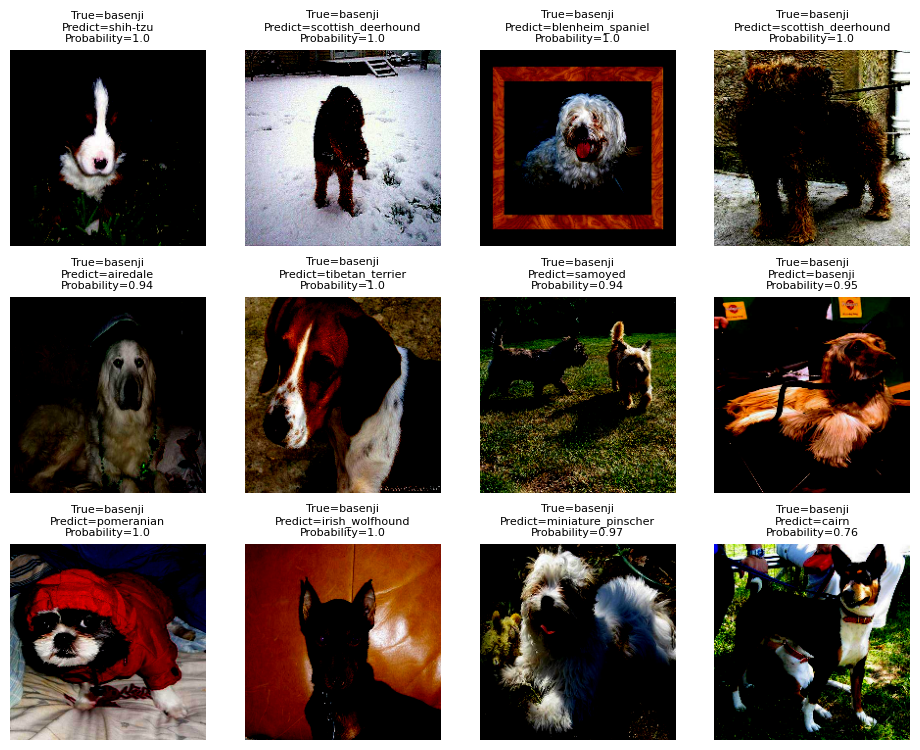

In [59]:
row = 3
column = 4

fig, ax = plt.subplots(row, column)
fig.set_size_inches(9, 7)

index = 0
for m in range(0, row):
    for n in range(0, column):
        true_data = np.argmax(y_test[index])  # Get the true class label
        pred_data = predict[index]  # Get the predicted class label
        probability = round(pre[index][pred_data], 2)
         
        font_size = 8  # Adjusting font size
        ax[m][n].set_title("True=" + str(lab[true_data]) + "\nPredict=" + str(lab[pred_data]) + "\nProbability=" + str(probability),
                           fontsize=font_size)
        
        ax[m][n].axis("off")
        ax[m][n].imshow(x_test[index])
        index += 1

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.2, hspace=0.20)
plt.show()


1/1 [==============================] - 1s 810ms/step


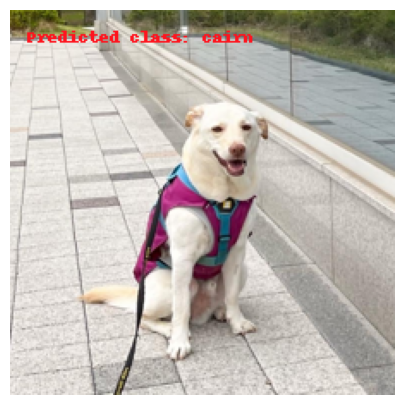

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import tensorflow as tf

# Local path to the image
sample_data = "./dog_data/dog_sample.jpg"

# Load the image from the local path
image_path = Image.open(sample_data)
image_resized_rgb = image_path.resize((224, 224)).convert('RGB')
image_array_rgb = np.array(image_resized_rgb)
image_scale_rgb = image_array_rgb.astype("float32") / 255.0
image_reshape_rgb = image_scale_rgb.reshape(1, 224, 224, 3)  

# Assuming 'model' and 'lab' are already defined
final_pred = model.predict(image_reshape_rgb)[0]
max_prob = np.argmax(final_pred)
results = lab  
my_predict = results[max_prob]

# Using the default font since loading external fonts can be platform-dependent
myFont = ImageFont.load_default()

image_draw = ImageDraw.Draw(image_resized_rgb)
image_draw.text((10, 10), f"Predicted class: {my_predict}", font=myFont, fill=(255, 20, 30))
# image_resized_rgb.save("my_image.png")

plt.figure(figsize=(5, 5))
plt.imshow(image_resized_rgb)
plt.axis("off")
plt.show()
